In [12]:
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [51]:
songs = pd.read_csv('Data/songs_audio_features_final.csv')
songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.708,0.566,11,-10.142,0,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,0.710,0.625,5,-15.300,0,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,0.716,0.783,4,-12.876,0,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,0.742,0.756,10,-6.197,1,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,0.726,0.907,5,-5.009,0,0.0894,0.000916,0.000521,0.2170,0.498,124.841
...,...,...,...,...,...,...,...,...,...,...,...
10265,0.378,0.665,2,-11.604,1,0.0352,0.020300,0.858000,0.3180,0.512,110.074
10266,0.123,0.785,0,-2.621,1,0.0638,0.000001,0.757000,0.3980,0.139,169.221
10267,0.527,0.293,0,-16.701,0,0.1320,0.669000,0.841000,0.1040,0.127,105.008
10268,0.498,0.995,3,-6.110,0,0.0493,0.008020,0.177000,0.2210,0.339,148.241


In [3]:
scaler = StandardScaler()
scaler.fit(songs)
songs_scaled = scaler.transform(songs)
songs_scaled_df = pd.DataFrame(songs_scaled, columns = songs.columns)
display(songs.head())
print()
display(songs_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.708,0.566,11,-10.142,0,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,0.710,0.625,5,-15.300,0,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,0.716,0.783,4,-12.876,0,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,0.742,0.756,10,-6.197,1,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,0.726,0.907,5,-5.009,0,0.0894,0.000916,0.000521,0.2170,0.498,124.841


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.677781,-0.148877,1.612111,-0.093473,-1.263092,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812
1,0.688645,0.083142,-0.075507,-0.970588,-1.263092,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523
2,0.721235,0.704481,-0.356777,-0.558388,-1.263092,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879
3,0.862461,0.598303,1.330841,0.577372,0.791708,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708
4,0.775553,1.192114,-0.075507,0.779391,-1.263092,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311


In [4]:
kmeans = KMeans(n_clusters=7, random_state=100)
kmeans.fit(songs_scaled_df)

KMeans(n_clusters=7, random_state=100)

In [5]:
kmeans.labels_

array([3, 2, 3, ..., 0, 3, 0], dtype=int32)

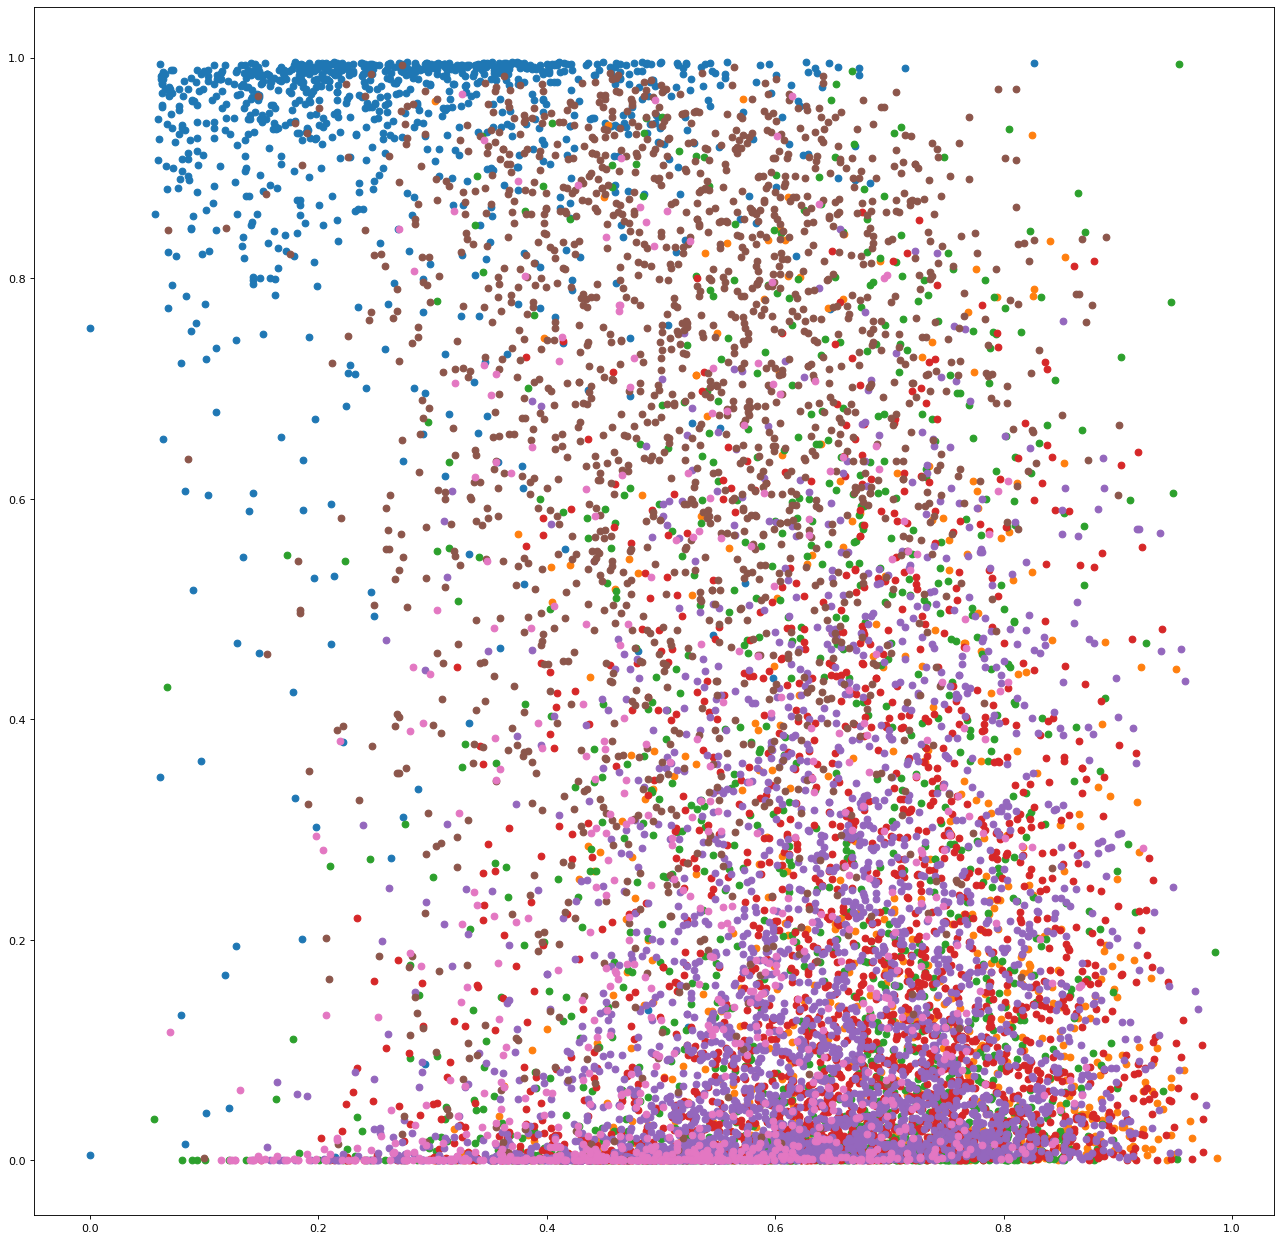

In [6]:
# assign a cluster to each example
labels = kmeans.predict(songs_scaled_df)

# retrieve unique clusters
clusters = np.unique(labels)

# create scatter plot for samples from each cluster
from matplotlib.pyplot import figure
figure(figsize=(20,20), dpi=80)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(songs.to_numpy()[row_ix, 0], songs.to_numpy()[row_ix, 6])
    # show the plot
pyplot.show()

In [7]:
clusters = kmeans.predict(songs_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     937
1     578
2    1353
3    2070
4    2842
5    1625
6     865
dtype: int64

In [8]:
songs["cluster"] = clusters
songs.to_csv('Data/songs_audio_features_with_clusters.csv')

In [9]:
kmeans.inertia_

59614.801542358306

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

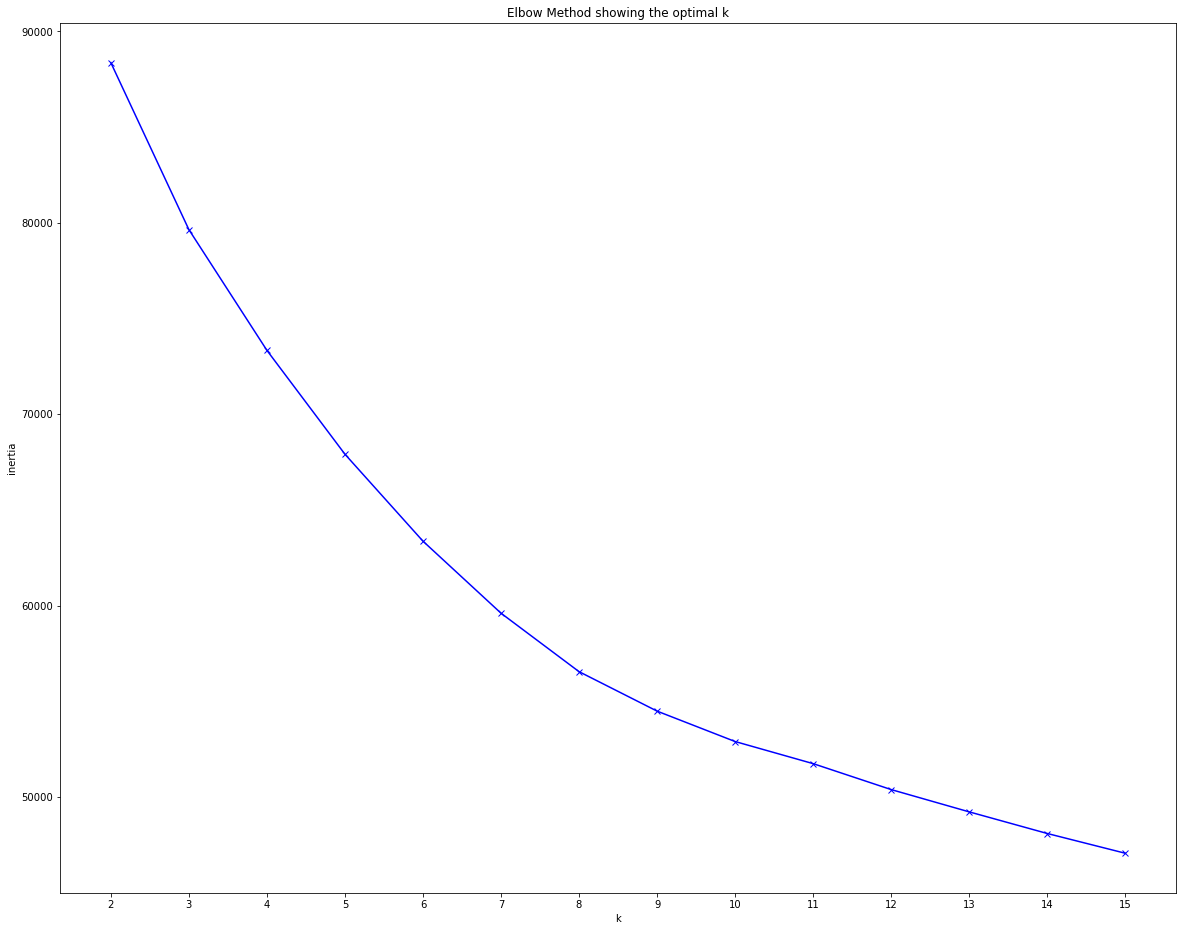

In [23]:
K = range(2,16)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=100)
    kmeans.fit(songs_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,16))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

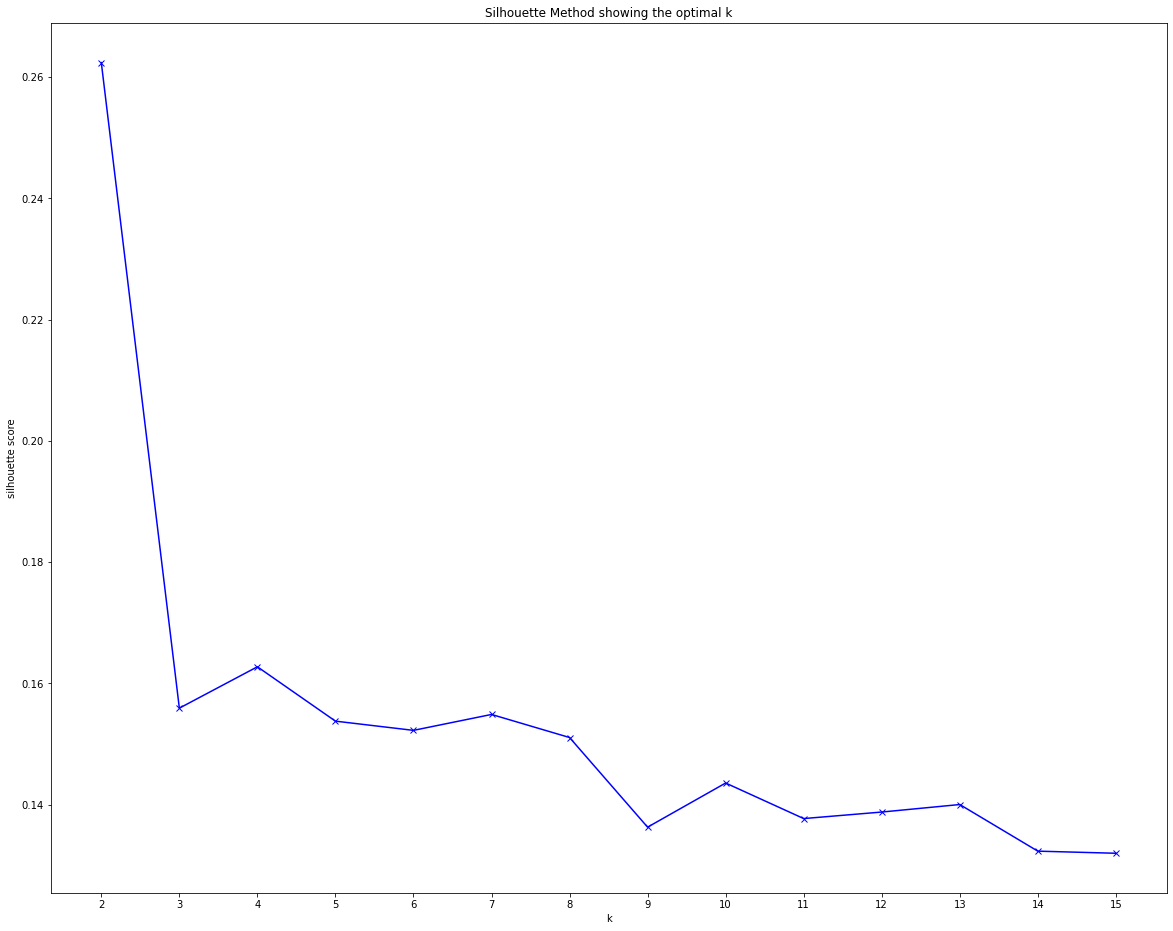

In [24]:
K = range(2,16)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=100)
    kmeans.fit(songs_scaled_df)
    
    
    
    silhouette.append(silhouette_score(songs_scaled_df, kmeans.predict(songs_scaled_df)))


plt.figure(figsize=(20,16))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [11]:
import pickle

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [22]:
## MODEL - VERSION 2 - 10 CLUSTERS

kmeans10 = KMeans(n_clusters=10, random_state=123)
kmeans10.fit(songs_scaled_df)
kmeans10.labels_

array([6, 8, 6, ..., 4, 0, 3], dtype=int32)

In [23]:
clusters10 = kmeans10.predict(songs_scaled_df)
#clusters
pd.Series(clusters10).value_counts().sort_index()

0    1017
1    1123
2     522
3     872
4     701
5     479
6    1743
7    1279
8    1156
9    1378
dtype: int64

In [24]:
songs["cluster"] = clusters1
songs.to_csv('Data/songs_audio_features_with_clusters_ver_2.csv')

In [25]:
with open("Model/kmeans_10.pickle", "wb") as f:
    pickle.dump(kmeans1,f)

In [61]:
## MODEL - VERSION 3 - NO KEY AND MODE

songs1 = songs.drop(columns=['key','mode'])
songs1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.708,0.566,-10.142,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,0.710,0.625,-15.300,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,0.716,0.783,-12.876,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,0.742,0.756,-6.197,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,0.726,0.907,-5.009,0.0894,0.000916,0.000521,0.2170,0.498,124.841
...,...,...,...,...,...,...,...,...,...
10265,0.378,0.665,-11.604,0.0352,0.020300,0.858000,0.3180,0.512,110.074
10266,0.123,0.785,-2.621,0.0638,0.000001,0.757000,0.3980,0.139,169.221
10267,0.527,0.293,-16.701,0.1320,0.669000,0.841000,0.1040,0.127,105.008
10268,0.498,0.995,-6.110,0.0493,0.008020,0.177000,0.2210,0.339,148.241


In [63]:
scaler_1 = StandardScaler()
scaler_1.fit(songs1)
songs_scaled_1 = scaler_1.transform(songs1)
songs_scaled_df_1 = pd.DataFrame(songs_scaled_1, columns = songs1.columns)
display(songs.head())
print()
display(songs_scaled_df_1.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.708,0.566,11,-10.142,0,0.0362,0.000127,0.033800,0.2900,0.731,121.997
1,0.710,0.625,5,-15.300,0,0.0414,0.004180,0.935000,0.1090,0.183,124.876
2,0.716,0.783,4,-12.876,0,0.0496,0.172000,0.034600,0.0327,0.952,121.306
3,0.742,0.756,10,-6.197,1,0.0825,0.021300,0.022700,0.0553,0.810,129.963
4,0.726,0.907,5,-5.009,0,0.0894,0.000916,0.000521,0.2170,0.498,124.841


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.677781,-0.148877,-0.093473,-0.496485,-0.920860,-0.550062,0.816979,0.833492,0.102812
1,0.688645,0.083142,-0.970588,-0.420639,-0.908622,2.029853,-0.455662,-1.205521,0.202523
2,0.721235,0.704481,-0.558388,-0.301036,-0.401859,-0.547772,-0.992140,1.655794,0.078879
3,0.862461,0.598303,0.577372,0.178836,-0.856925,-0.581838,-0.833236,1.127437,0.378708
4,0.775553,1.192114,0.779391,0.279478,-0.918478,-0.645332,0.303704,-0.033461,0.201311


In [69]:
kmeans_limited = KMeans(n_clusters=6, random_state=123)
kmeans_limited.fit(songs_scaled_df_1)
kmeans_limited.labels_

array([0, 2, 0, ..., 3, 4, 3], dtype=int32)

In [70]:
kmeans_limited.inertia_

44083.258037774736

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

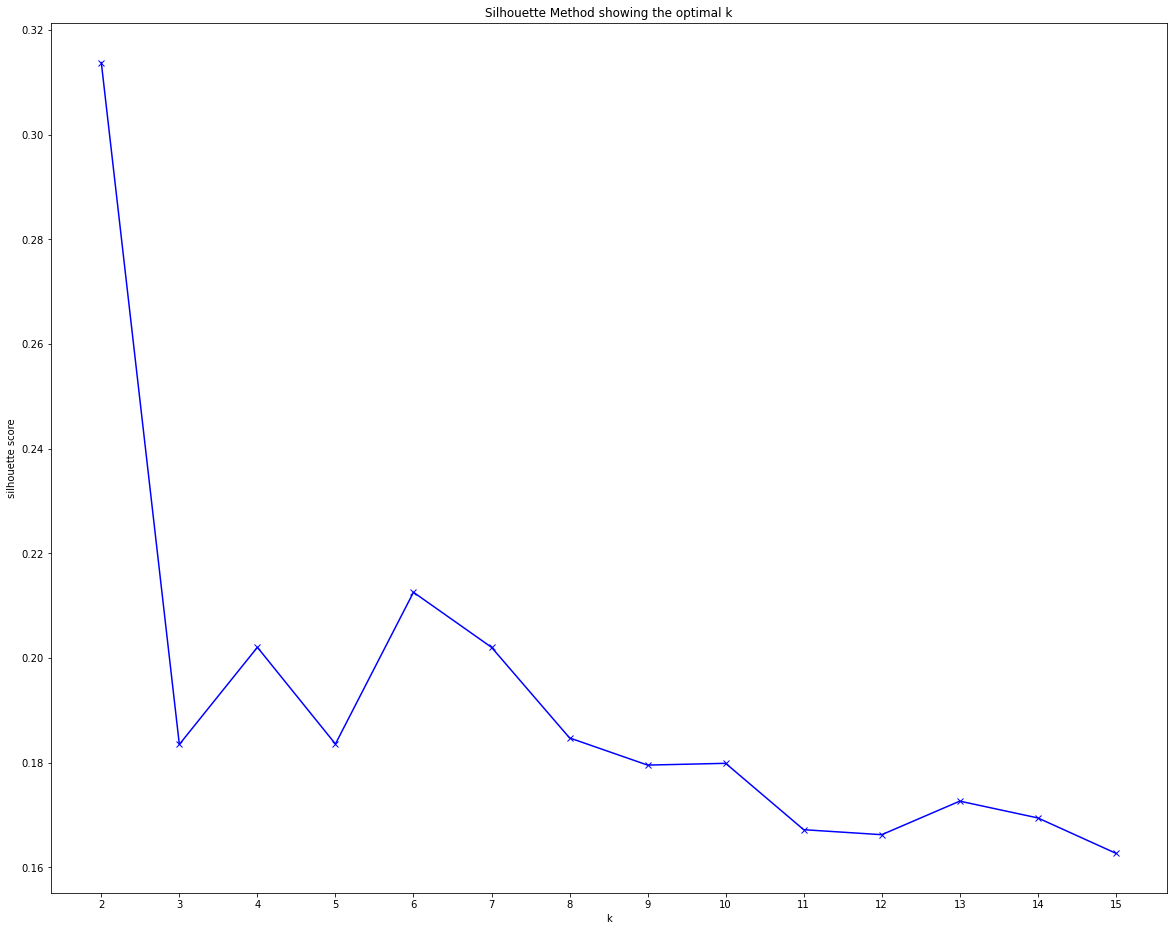

In [68]:
K = range(2,16)
silhouette = []

for k in K:
    kmeansx = KMeans(n_clusters=k,
                    random_state=123)
    kmeansx.fit(songs_scaled_df_1)
    
    
    silhouette.append(silhouette_score(songs_scaled_df_1, kmeansx.predict(songs_scaled_df_1)))


plt.figure(figsize=(20,16))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [71]:
import pickle

with open("Model/scaler_limited.pickle", "wb") as f:
    pickle.dump(scaler_1,f)

with open("Model/kmeans_limited.pickle", "wb") as f:
    pickle.dump(kmeans_limited,f)